In [1]:
import sys
sys.path.append("..")
from functions.pipeline import *

In [2]:
dataloader = get_batch("../ACDC",10,debug=True)

In [3]:
embeddings,ground_truths = next(iter(dataloader))

In [4]:
prompt_class_1 = []
prompt_class_2 = []
prompt_class_3 = []
for id,ground_truth in enumerate(ground_truths):
    print(id)
    print("class1")
    prompt_class_1.append(batch_sample_from_class(10, ground_truth, 1, n_foreground = 1, n_background= 1))
    print("class2")
    prompt_class_2.append(batch_sample_from_class(10, ground_truth, 2, n_foreground = 1, n_background= 1))
    print("class3")
    prompt_class_3.append(batch_sample_from_class(10, ground_truth, 3, n_foreground = 1, n_background= 1))

0
class1
class2
class3
1
class1
class2
class3
2
class1
class2
class3
3
class1
class2
class3
4
class1
class2
class3
5
class1
class2
class3
6
class1
class2
class3
7
class1
class2
class3
8
class1
n_foreground was reduced to 0.
class2
class3
9
class1
class2
class3


In [5]:
prompt_class_1[8]

(tensor([[[110, 112]],
 
         [[113, 100]],
 
         [[110, 117]],
 
         [[114, 103]],
 
         [[115, 100]],
 
         [[104, 114]],
 
         [[112, 111]],
 
         [[113, 104]],
 
         [[107, 106]],
 
         [[107,  99]]]),
 tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]))

In [6]:
test = analyze(embeddings,ground_truths)

In [7]:
masks= test.generate_masks(prompt_class_1,prompt_class_2,prompt_class_3,10)

In [8]:
masks.shape

torch.Size([10, 10, 256, 216])

In [9]:
masks = masks.cpu()

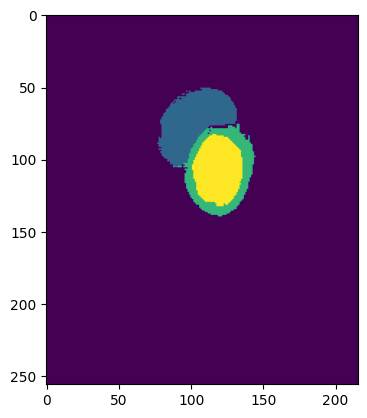

In [10]:
# Mask prediction after calculating logits
import matplotlib.pyplot as plt
plt.imshow(masks[0,2,:,:])

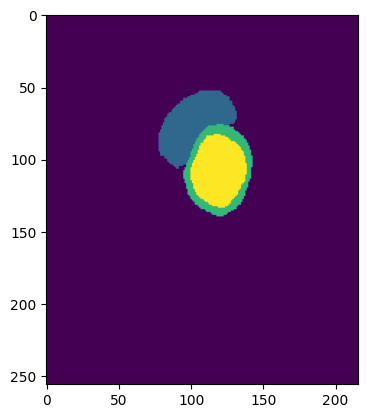

In [11]:
plt.imshow(ground_truths[0,:,:])

In [12]:
scores = []
masks = masks.cuda()
for f in test.metrics.values():
    print(f)
    score= test.scoring_function(f)
    scores.append(score)

<class 'torchmetrics.classification.f_beta.BinaryF1Score'>
<class 'torchmetrics.classification.jaccard.BinaryJaccardIndex'>
<class 'torchmetrics.classification.accuracy.BinaryAccuracy'>


In [13]:
scores[0][8,:,:]

tensor([[0.0000, 0.6455, 0.8031],
        [0.0000, 0.5256, 0.7429],
        [0.0000, 0.5994, 0.7612],
        [0.0000, 0.5685, 0.8062],
        [0.0000, 0.5935, 0.7809],
        [0.0000, 0.6846, 0.8117],
        [0.0000, 0.6902, 0.8155],
        [0.0000, 0.7212, 0.7895],
        [0.0000, 0.2201, 0.7123],
        [0.0000, 0.5955, 0.7732]])

In [14]:
results = test.get_results(scores[0],scores[1],scores[2],(1,1),(1,1),(1,1))

In [15]:
re = Results("../ACDC","test")
re.append_row(results)